In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

In [3]:
# Configuración para presentar todas las líneas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None) # Mostrar todas las columnas sin truncar
pd.set_option('display.width', 1000) # Establecer el ancho máximo de las líneas

In [9]:
# Cargue de la información
url = 'https://raw.githubusercontent.com/julaux/Data-Analysis/refs/heads/main/Credit%20card%20analysis/AER_credit_card_data.csv'
data = pd.read_csv(url)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [10]:
# Visualización de las primeras filas de Data Frame
data.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


+ card: Dummy variable, 1 if application for credit card accepted, 0 if not
+ reports: Number of major derogatory reports
+ age: Age n years plus twelfths of a year
+ income: Yearly income (divided by 10,000)
+ share: Ratio of monthly credit card expenditure to yearly income
+ expenditure: Average monthly credit card expenditure
+ owner: 1 if owns their home, 0 if rent
+ selfemp: 1 if self employed, 0 if not
+ dependents: 1 + number of dependents
+ months: Months living at current address
+ majorcards: Number of major credit cards held
+ active: Number of active credit accounts

Se cambiará los valores "yes" por 1 y "no" por 0 en las columans categóricas.

La columna "age" se redondeará las cifras sin decimales y se convertirá a int.

Se realizarán gráficos para entender como se distribuyen algunas variables y tener una primera idea de cuales son interensantes explorar en el análisis.

Son datos de personas con tarjeta de crédito, por tanto, es interesante ver como se relacionan o qué patrones se detectan en las variables.

Se cuenta con variables categóricas, las cuales serán transformadas a ordinales, la mayoría aplica para One-Hot encoding.

In [11]:
data[['card', 'owner', 'selfemp']] = data[['card', 'owner', 'selfemp']].replace({'yes': 1, 'no': 0})
data['age'] = data['age'].round().astype(int)
# data['expenditure'] = data['expenditure'].round(2)
data['income'] = data['income']*10000
data['income'] = data['income'].astype(int)
data['share'] = data['share'].round(4)

# Verificamos
data.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,38,45199,0.0333,124.983300,1,0,3,54,1,12
1,1,0,33,24200,0.0052,9.854167,0,0,3,34,1,13
2,1,0,34,45000,0.0042,15.000000,1,0,4,58,1,5
3,1,0,30,25400,0.0652,137.869200,0,0,0,25,1,7
4,1,0,32,97867,0.0671,546.503300,1,0,2,64,1,5
5,1,0,23,25000,0.0444,91.996670,0,0,0,54,1,1
6,1,0,28,39600,0.0126,40.833330,0,0,2,7,1,5
7,1,0,29,23700,0.0764,150.790000,1,0,0,77,1,3
8,1,0,37,38000,0.2456,777.821700,1,0,0,97,1,6
9,1,0,28,32000,0.0198,52.580000,0,0,0,65,1,18


Verificamos que no hayan valores ausentes en el dataset

In [7]:
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [12]:
print(data.describe())

              card      reports          age         income        share  expenditure        owner      selfemp   dependents       months   majorcards       active
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000
mean      0.775588     0.456406    33.207733   33653.741471     0.068732   185.057071     0.440485     0.068992     0.993935    55.267627     0.817286     6.996967
std       0.417353     1.345267    10.157152   16939.023985     0.094654   272.218917     0.496634     0.253536     1.247745    66.271746     0.386579     6.305812
min       0.000000     0.000000     0.000000    2100.000000     0.000100     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       1.000000     0.000000    25.000000   22437.500000     0.002300     4.583333     0.000000     0.000000     0.000000    12.000000     1.000000     2.000000
50%       1.0000

c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

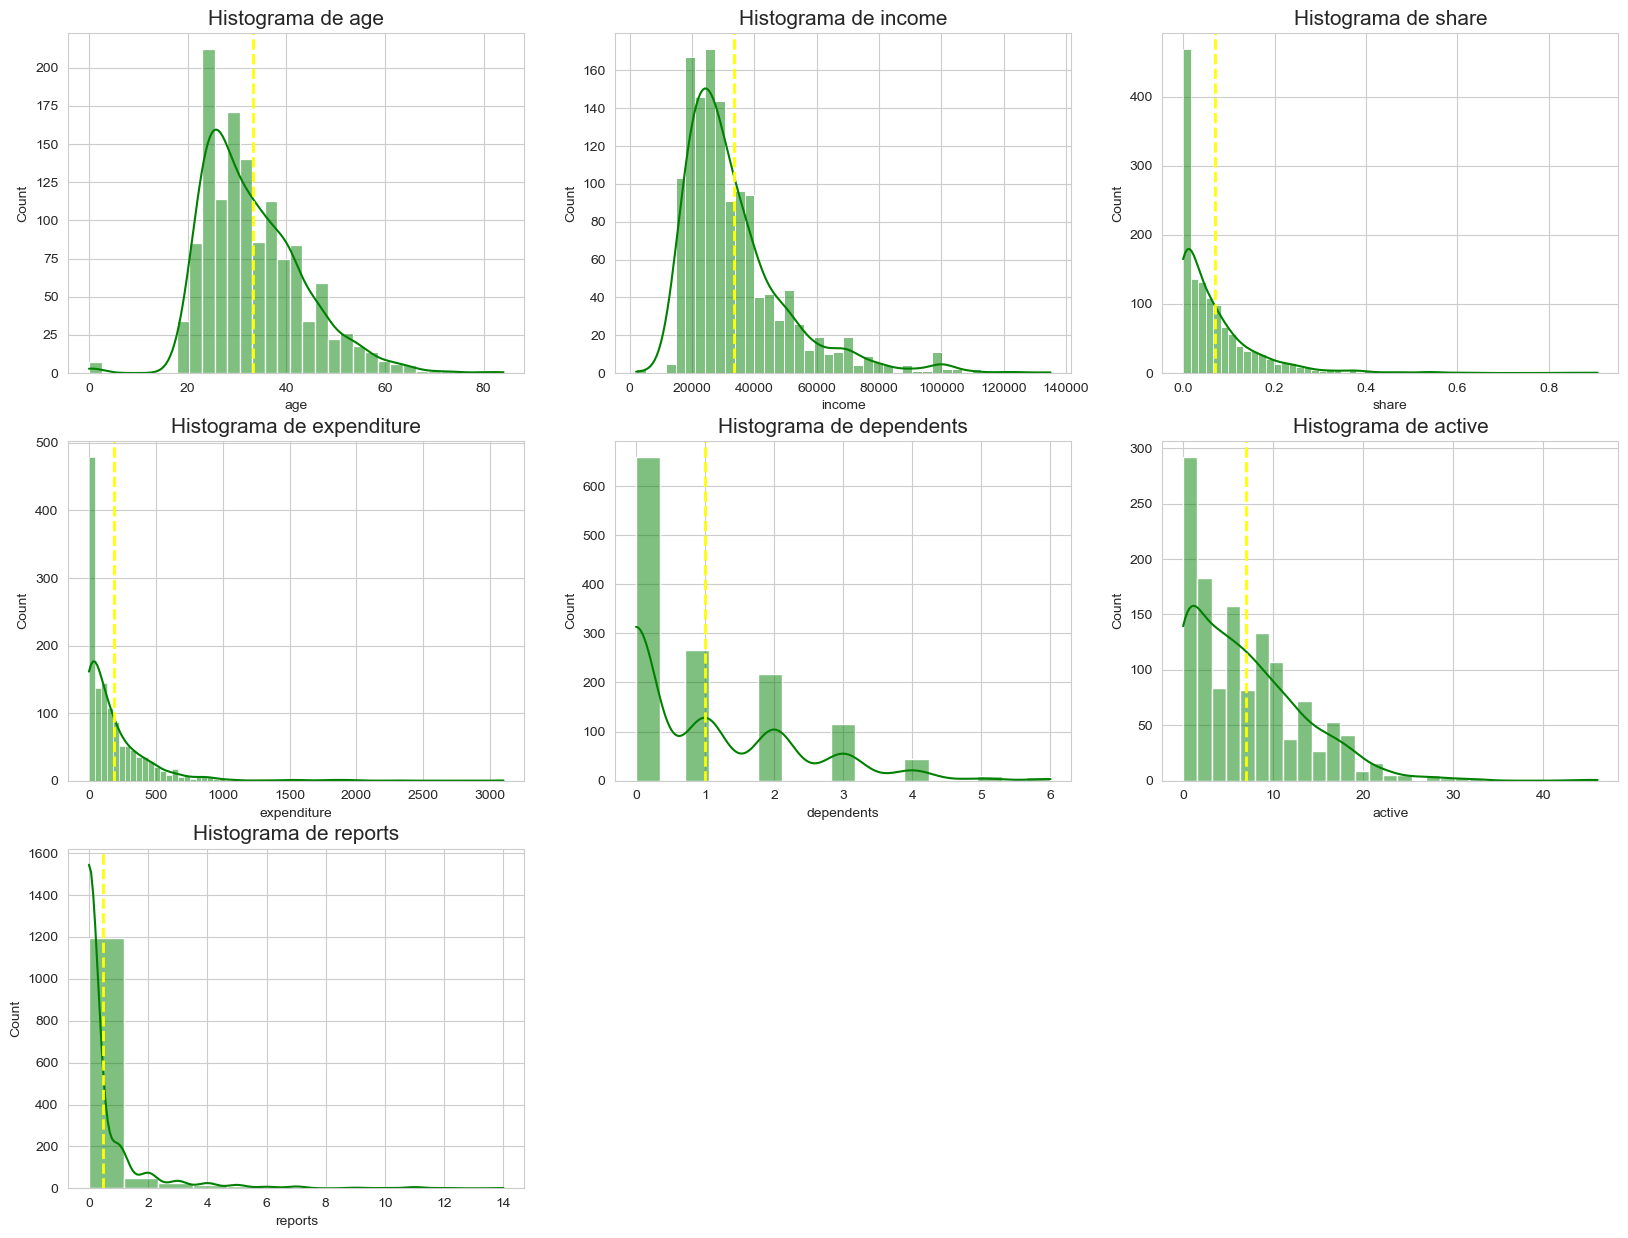

In [13]:
# VISUALIZACIÓN DE LAS VARIABLES NUMÉRICAS

var_numericas = ['age', 'income', 'share', 'expenditure', 'dependents', 'active', 'reports']

nfilas = 3 # Cantidad de filas
ncol = 3 # Cantidad de columnas

fig, axs = plt.subplots(nrows=nfilas, ncols=ncol, figsize=(20, 15)) # 
axs = axs.flatten() # Aplana la matriz (axs) para facilitar el acceso durante el bucle for

for i, columna in enumerate(var_numericas):
    if i < len(axs):
        sns.histplot(data=data, x=columna, ax=axs[i], kde=True, color='green') # kde para agregar la curva de densidad
        media_col = data[columna].mean() # Calcula la media de la columna
        axs[i].axvline(media_col, color='yellow', linestyle='--', linewidth=2, label=f'media: {media_col: .2f}') # muestra la media 
        axs[i].set_title(f'Histograma de {columna}', fontsize=15)


for j in range(i+1, len(axs)): # Oculta los gráficos vaciós
    fig.delaxes(axs[j])  # Eliminar el gráfico vacío

#plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

# Para crear histogramas en lugar de gráficos de conteo, se usa sns.histplot en lugar de sns.countplot. Los histogramas son más adecuados para datos numéricos y te permiten visualizar la distribución de valores continuos o discretos, mientras que countplot se utiliza típicamente para datos categóricos.

## NOTAS

En los histogramas se observa lo siguiente:

+ Para la edad, el promedio está cercano a 35 años, en el uso de la tarjeta de crédito, la distribución tiende a ser normal.
+ Para la variable "income", la cual es el ingreso anual, la mayorías de personas cuentan con un ingreso cercano a los 20 mil.
+ Para la predictora expenditure, el gasto promedio mensual con la credit card se situa en la mayoría cerca a 200.
+ El número de cuentas de crédito activas por persona (variable "active"), está en su mayoría en 1 cuenta y en promedio a 7.
+ La media de cantidad de reportes derogatorios para una persona está en 0 reportes, lo máximo en reportes son 14.

Se graficarán las variables categóricas ordinales.

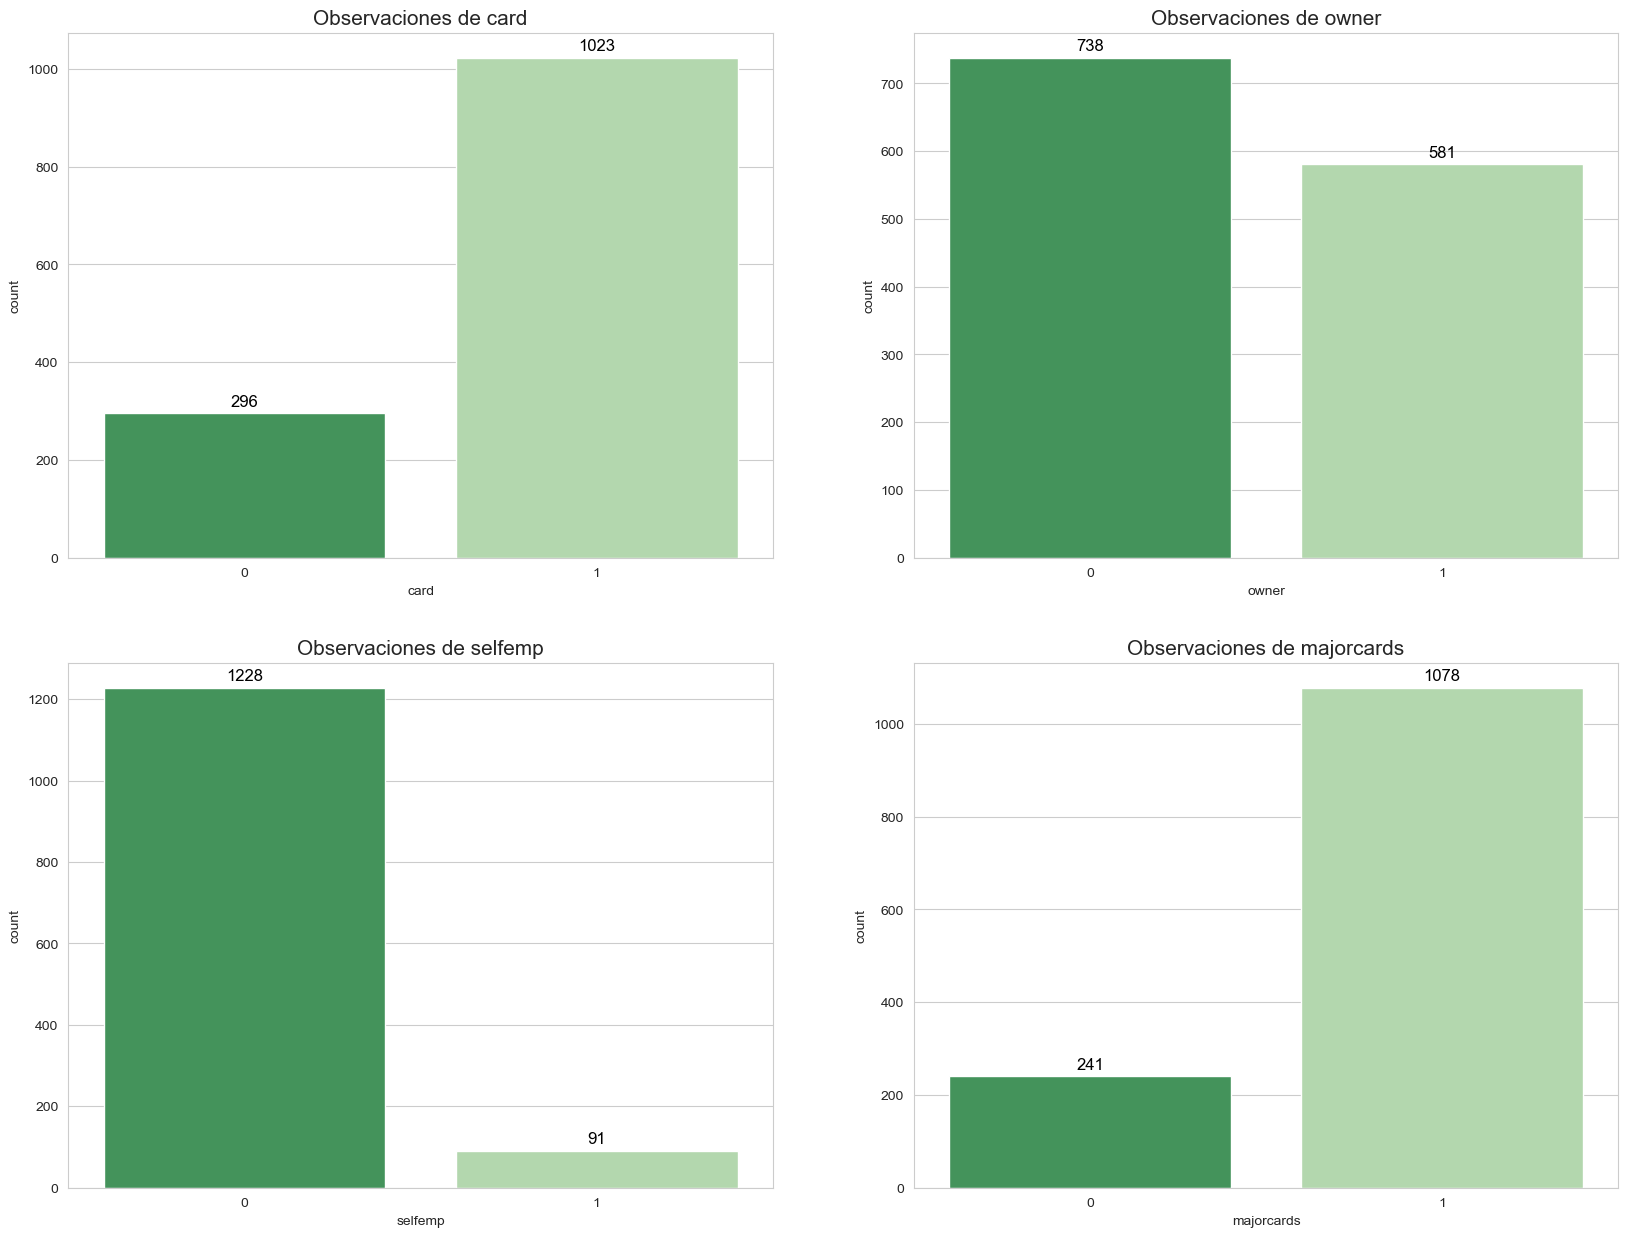

In [109]:
# VISUALIZACIÓN DE LAS VARIABLES CATEGÓRICAS
# Número de observaciones para cada variable categórica

var_categoricas = ['card', 'owner', 'selfemp', 'majorcards']

nfilas = 2 # Cantidad de filas
ncol = 2 # Cantidad de columnas

fif, axs = plt.subplots(nrows=nfilas, ncols=ncol, figsize=(20, 15)) # 
axs = axs.flatten() # Aplana la matriz (axs) para facilitar el acceso durante el bucle for

for i, columna in enumerate(var_categoricas):
    if i < len(axs):
        ax = sns.countplot(data=data, x=columna, ax=axs[i], palette='Greens_r')
        axs[i].set_title(f'Observaciones de {columna}', fontsize=15)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')

#plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

## NOTAS

+ En los 1319 registros de la base de datos, 1023 personas aprueban el estudio para la tarjeta de crédito y 296 desaprueban.
+ Solo 581 personas cuentan con vivienda propia y el resto es arrendada.
+ El 7% de las personas son independientes, el 93% son empleados.

Podemos ver como es la media de las variables para las personas que están clasificadas como selfemp o no y si son dueños de viviendas (owner)

In [110]:
# Para la variable "selfemp"
print(data.groupby('selfemp').mean())

# Para la variable "owner"
print('\n',data.groupby('owner').mean())

             card   reports        age        income     share  expenditure     owner  dependents     months  majorcards    active
selfemp                                                                                                                           
0        0.781759  0.449511  32.930782  33136.131922  0.070764   187.696816  0.434853    0.979642  54.078990    0.816775  6.946254
1        0.692308  0.549451  36.945055  40638.626374  0.041309   149.433297  0.516484    1.186813  71.307692    0.824176  7.681319

            card   reports        age        income     share  expenditure   selfemp  dependents     months  majorcards    active
owner                                                                                                                           
0      0.720867  0.520325  29.884824  28774.323848  0.070055   162.559377  0.059621    0.651762  41.239837    0.795393  5.459350
1      0.845095  0.375215  37.428571  39851.693632  0.067051   213.633907  0.080895    

+ Las personas independientes "selfemp" = 1, tienen en promedio 37 años, el ingreso anual está en 40638, siendo un ingreso mayor que las personas empleadas.
+ Las personas con casa propia, son aprobadas para el crédito en su mayoria y su edad en promedio es de 37 años.

Las siguientes gráficas exponen la relación de la aprobación del crédito "card" = 1, con otras variables como "owner" = 1 cuando la persona por ejemplo cuenta con vivienda propia.

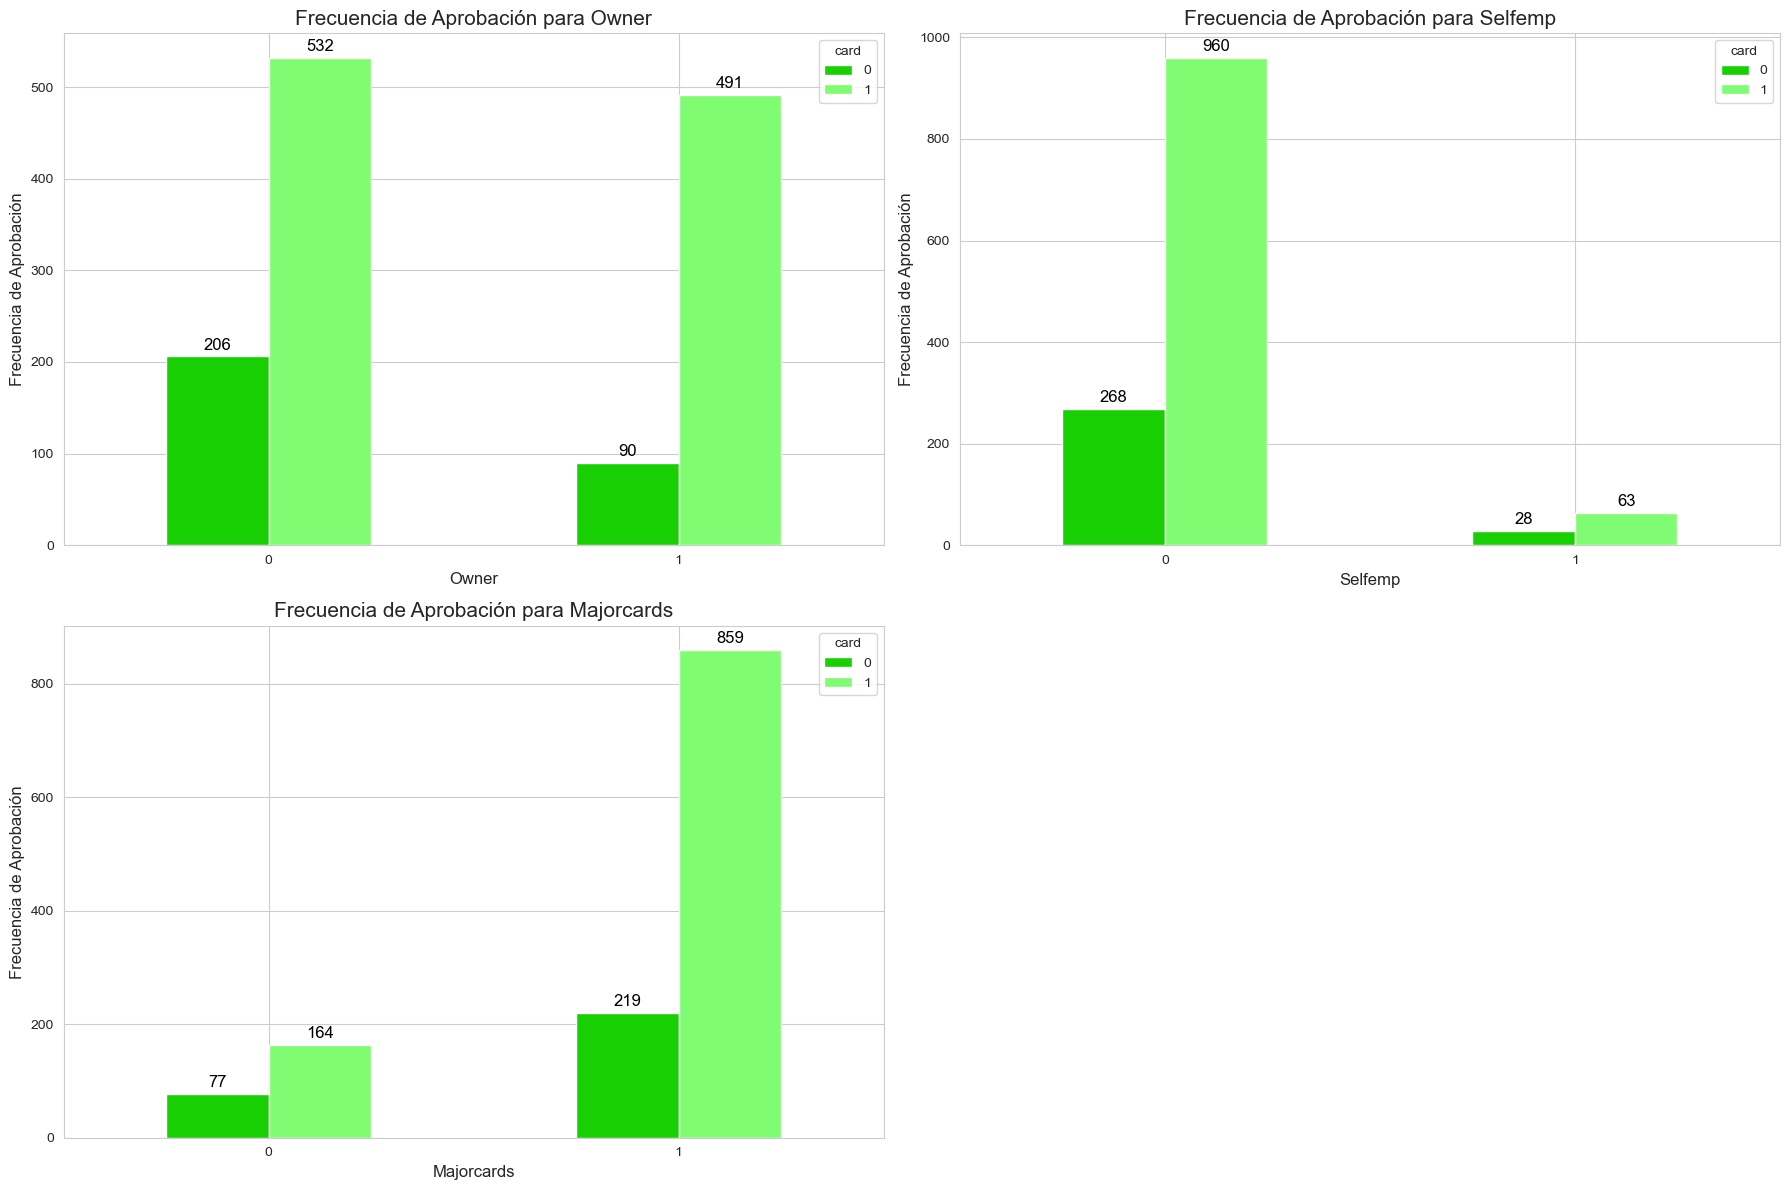

In [149]:
categorias = ['owner', 'selfemp', 'majorcards']

nfilas = 2
ncol = 2

fig, axs = plt.subplots(nrows=nfilas, ncols=ncol, figsize=(18, 12))
axs = axs.flatten()  # Aplana la matriz de ejes para facilitar el acceso

for i, columna in enumerate(categorias):
    if i < len(axs):
        crosstab = pd.crosstab(data[columna], data['card'])

        ax = crosstab.plot(kind='bar', ax=axs[i], color=['#18cf03', '#80fc72']) 
        
        # Añadir etiquetas en las barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')

       # Títulos y etiquetas
        axs[i].set_title(f'Frecuencia de Aprobación para {columna.capitalize()}', fontsize=15)
        axs[i].set_xlabel(columna.capitalize(), fontsize=12)
        axs[i].set_ylabel('Frecuencia de Aprobación', fontsize=12)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0) 



# Eliminar gráficos vacíos si hay menos categorías que subplots
if len(categorias) < len(axs):
    for j in range(len(categorias), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## NOTAS

+ Para las personas que cuentan con o sin vivienda propia (variable owner), la diferencia en aprobación de la tarjeta de crédito no es significativo, por tanto, el contar con vivienda propia no es un factor influyente en la aprobación.
+ Las personas con salario independiente si presentan una diferencia muy notoria en la cantidad de aprobación de tarjeta; cuando la persona es independiente la cantidad de aprobación es muchísima menor que cuando el salario es por empleo.
+ Para una persona si influye demasiado el poder tener varias tarjetas de crédito, esto le da mejor calificación para la aprobación.

Realizaremos varios gráficos de dispersión para determinar grupos.

## GRÁFICO INGRESO MENSUAL VS GASTO MENSUAL EN TARJETA DE CRÉDITO 

Se realizará un gráfico de dispersión con kluster para determinar grupos

c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

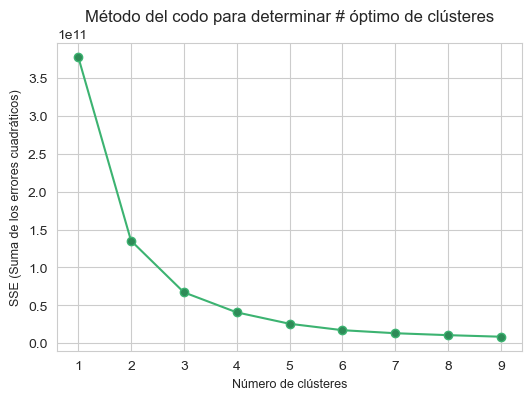

In [222]:
# Selección del número de grupos o clases
# Método del codo (Elbow Method)

# Selección de las variables "income" y "expenditure" para el clustering
X = data[['income', 'expenditure']]

# Cálculo del SSE para diferentes cantidades de clústeres, El SSE es la suma de las distancias cuadráticas entre los puntos de datos y sus respectivos centroides
sse = []
k_values = range(1, 10) # Se probará con 1 a 9 clústeres

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) # inertia_ es el SSE

plt.figure(figsize=(6,4))
plt.plot(k_values, sse, marker='o', color='mediumseagreen', markerfacecolor='seagreen')
plt.title('Método del codo para determinar # óptimo de clústeres', fontsize=12)
plt.xlabel('Número de clústeres', fontsize=9)
plt.ylabel('SSE (Suma de los errores cuadráticos)', fontsize=9)
plt.show()

El método del codo es una técnica visual que te ayuda a elegir el número adecuado de clústeres. La idea es observar cómo cambia la suma de los errores cuadráticos (SSE) a medida que se aumenta el número de clústeres. El SSE es la suma de las distancias cuadráticas entre los puntos de datos y sus respectivos centroides.

El gráfico resultante generalmente tiene una forma de codo, y el número de clústeres óptimo suele estar en el "punto de inflexión" del codo. En este caso, el número óptimo de clúster es de 3.

c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julian.aux\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


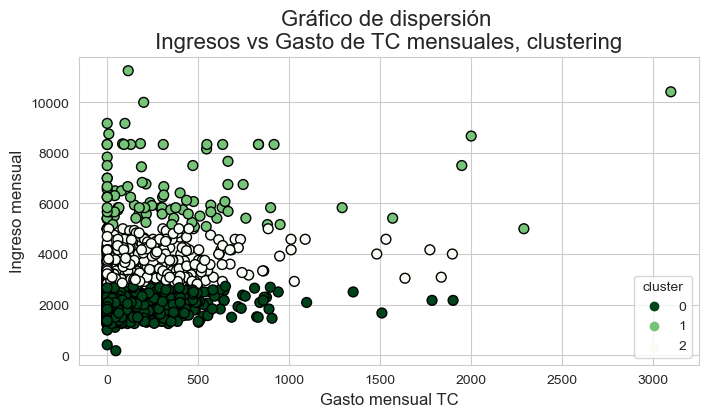

In [24]:
from sklearn.cluster import KMeans

# Ganancia anual a mensual
data['income_month'] = data['income']/12

# Selección de las variables "income" y "expenditure" para el clustering
grupo = data[['income_month', 'expenditure']]

# Definición del número de clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajuste del modelo a los datos
kmeans.fit(grupo)

# Obtención de los grupos a los que pertenece cada uno
data['cluster'] = kmeans.labels_

# Gráfico coloreado por grupo
plt.figure(figsize=(8, 4)) # Tamaño del plot
sns.scatterplot(data=data, x='expenditure', y='income_month', hue='cluster', palette='Greens_r', s=50, edgecolor='black', linewidth=1) # 2 modifica el tamaño de los círculos.

# Títulos y etiquetas
plt.title('Gráfico de dispersión \nIngresos vs Gasto de TC mensuales, clustering', fontsize=16)
plt.xlabel('Gasto mensual TC', fontsize=12)
plt.ylabel('Ingreso mensual', fontsize=12)

plt.show()

## NOTAS DEL GRÁFICO
 
A partir del método del codo para seleccionar la cantidad de clústeres, se seleccionó una clasificación de 3 clusteres. Se observan 3 grupos: grupo 1, ingresos mensuales de 1500 a 3000, grupo 2: 3000 a 5000 y grupo 3: 5000 hasta aproximadamente un ingreso de 10 mil, todas las clases con un tope promedio de gastos mensuales en la tarjeta de crédito en máximo 1000.

## CONCLUSIÓN

El análisis revela que la aprobación de las tarjetas de crédito está influenciada por varias características demográficas y financieras. La edad promedio está alrededor de 35 años, y aunque el ingreso anual promedio es bajo (cerca de 20 mil), el gasto mensual con la tarjeta de crédito es moderado (alrededor de 200). La cantidad de cuentas activas y la ausencia de reportes derogatorios también son factores clave. Las personas con vivienda propia y empleados tienen una mayor tasa de aprobación, mientras que los independientes, a pesar de tener mayores ingresos, son aprobados con mucha menor frecuencia. Además, poseer varias tarjetas de crédito mejora significativamente las probabilidades de aprobación. El análisis por clústeres identificó tres grupos de ingresos mensuales, todos con un gasto promedio en tarjeta que no excedía en la mayoría los 1000.